# 📊 Exploratory Data Analysis – Superstore Sales Data

## 📝 Project Objective:
The aim of this project is to perform **in-depth Exploratory Data Analysis (EDA)** on the **Sample Superstore dataset**, which includes customer orders from a US-based retail store.

We analyze sales, profit, discounts, and other business parameters across multiple dimensions like **region, category, state, and time**, in order to generate actionable **business insights**.

## 🧾 Dataset Description:
- **Rows:** 9994  
- **Columns:** 21  
- The dataset contains information about:
  - Order details (Order ID, Order Date, Ship Mode)
  - Customer information (Name, Segment, Region)
  - Product details (Category, Sub-Category)
  - Financial metrics (Sales, Profit, Quantity, Discount)

## 🔍 Goals of the Analysis:
- Identify top-performing and loss-making products & states  
- Understand the impact of discounts on profit  
- Analyze time trends in sales & profit  
- Detect outliers that affect business decisions  
- Provide recommendations for business strategy


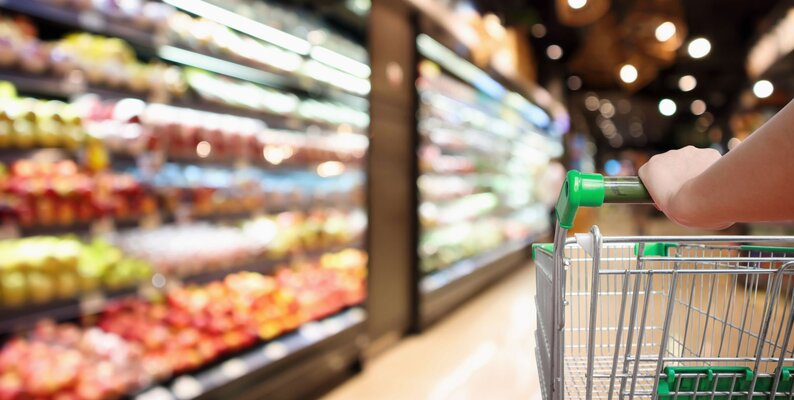

# **1.Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings

**1.1 Loading Superstore_Data**

In [11]:
df = pd.read_csv('/content/sample_data/Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**1.2 Data_shape**

In [12]:
df.shape

(9994, 21)

**1.3 Columns**

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**1.4 Data Information**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**1.5 Missing Values**

In [15]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


**1.6 Dupilcated Values**

In [21]:
df.duplicated().value_counts()

,count
False,9994


**1.7 Statistical Description of Superstore Data**

In [58]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Year
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555


# **2.Univariate Analysis**

**Sales Distribution**

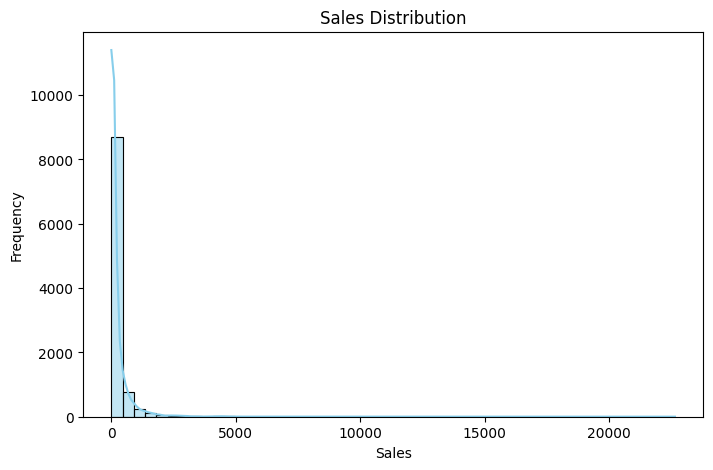

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True, color='skyblue')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

**Insight:**

“Sales is right-skewed. Most orders have low sales values; a few high-ticket items drive big revenue.”

**Profit Distribution**

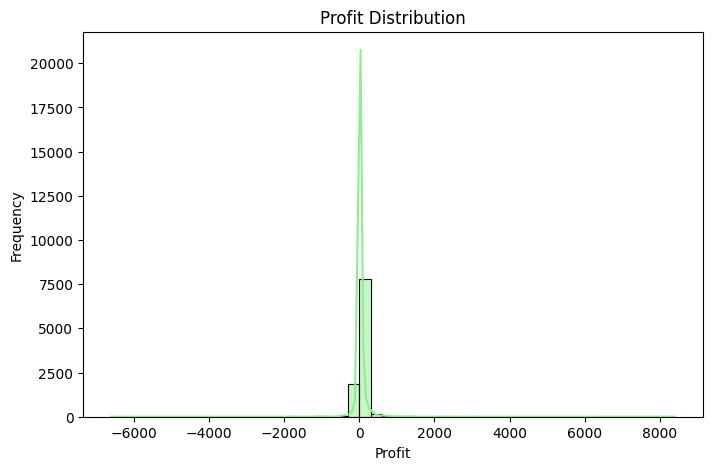

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=50, kde=True, color='lightgreen')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

**Insight:**

“Profit shows both gains and losses. There are negative values — meaning some products or regions are incurring losses.”

**Discount Distribution**

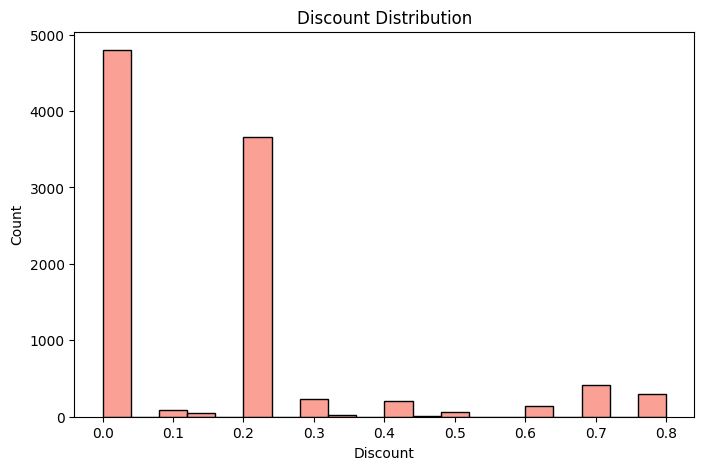

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['Discount'], bins=20, kde=False, color='salmon')
plt.title("Discount Distribution")
plt.xlabel("Discount")
plt.ylabel("Count")
plt.show()

**Insight:**

“Discounts are applied in fixed slabs like 0%, 20%, 30%, and 40%. We can later study how high discounts affect profit.”

**Quantity Distribution**

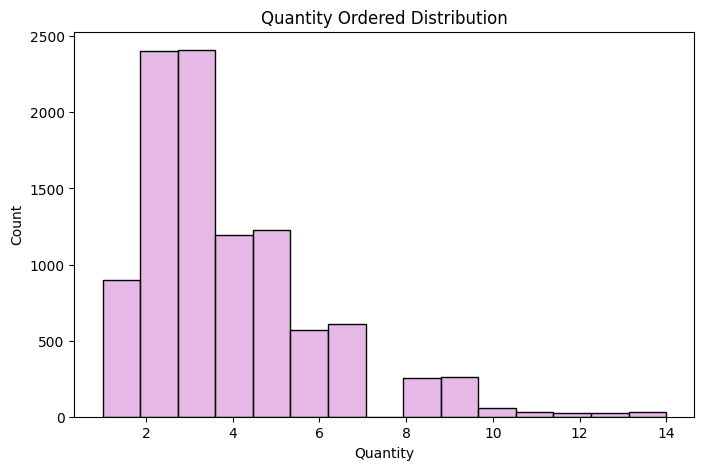

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=15, kde=False, color='plum')
plt.title("Quantity Ordered Distribution")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

**Insight:**

“Most customers buy low quantities (1 to 4 items), with very few bulk orders.”

“**In univariate analysis**, I studied the core numerical variables:

-Sales is right-skewed, indicating majority of low-value transactions.

-Profit has both positive and negative values, hinting at loss-making areas.

-Discounts are applied in fixed slabs, which might be impacting profit.

-Most customers order fewer than 4 items — indicating retail-level, not
 wholesale.”

# **3.BI-Variate Analysis**

**Discount vs Profit**

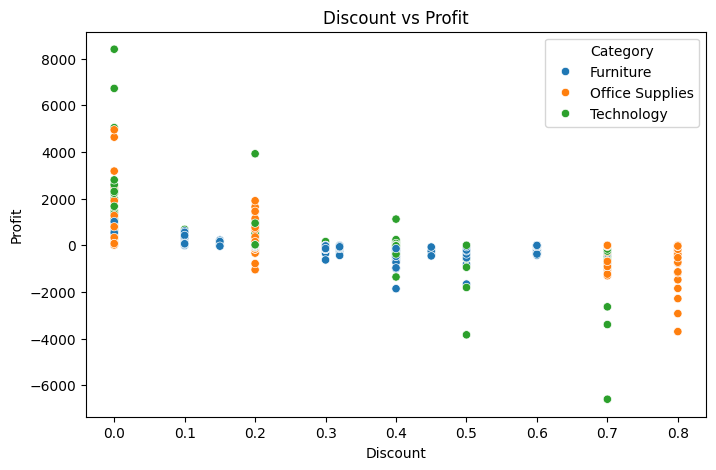

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category')
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

**Insight:**

“Higher discounts generally lead to lower profit. Especially at 0.2, 0.3, and 0.4 discount levels, many transactions are loss-making.”

**Sales vs Profit**

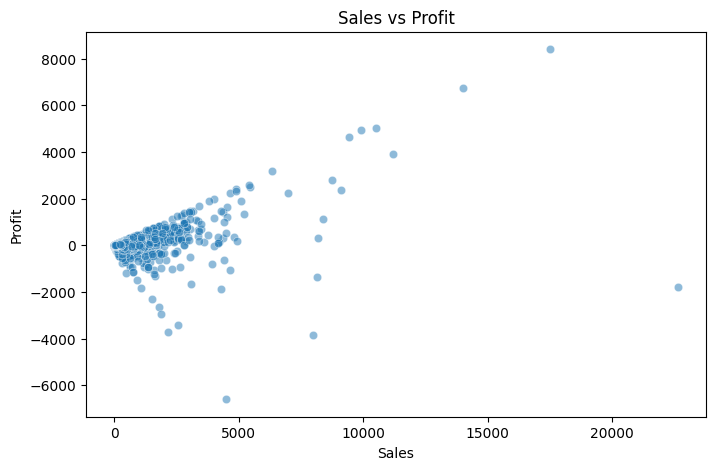

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.5)
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

**Insight:**

“Higher sales don’t always mean higher profits. Some high-sales items still show loss — needs further product/region drill-down.”

**Category-Wise Profit**

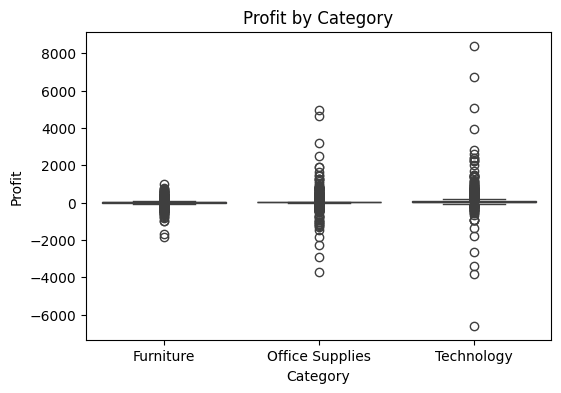

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title("Profit by Category")
plt.show()

**Insight:**

“Office Supplies and Furniture have more negative profits compared to Technology.”

**Sub-Category Profit**

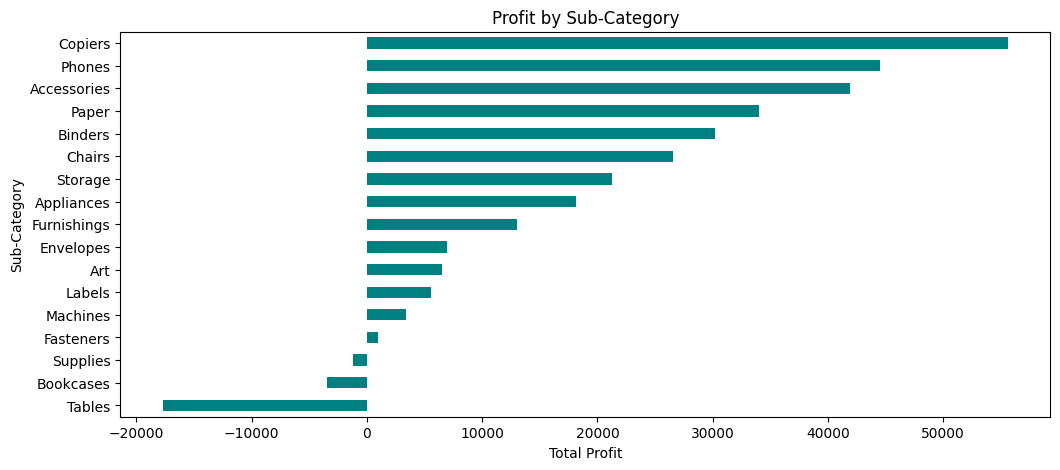

In [37]:
plt.figure(figsize=(12,5))
sub_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
sub_profit.plot(kind='barh', color='teal')
plt.title("Profit by Sub-Category")
plt.xlabel("Total Profit")
plt.show()

**Insight:**

“Tables and Bookcases are major loss contributors. Copiers and Phones are highly profitable.”

**Ship-Mode Impact**

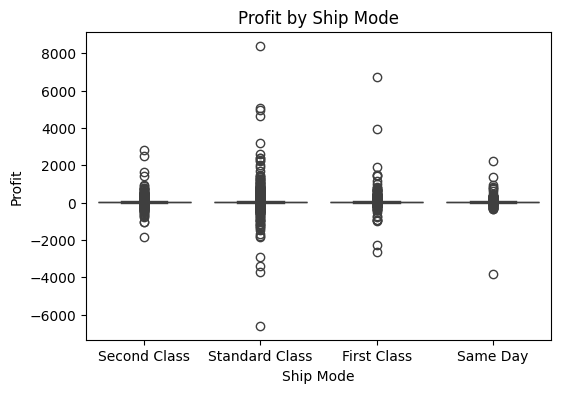

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Ship Mode', y='Profit', data=df)
plt.title("Profit by Ship Mode")
plt.show()

**Insight:**

“No significant difference in profit by ship mode, but Standard Class is most frequently used.”

**Region State/Wise Profit**

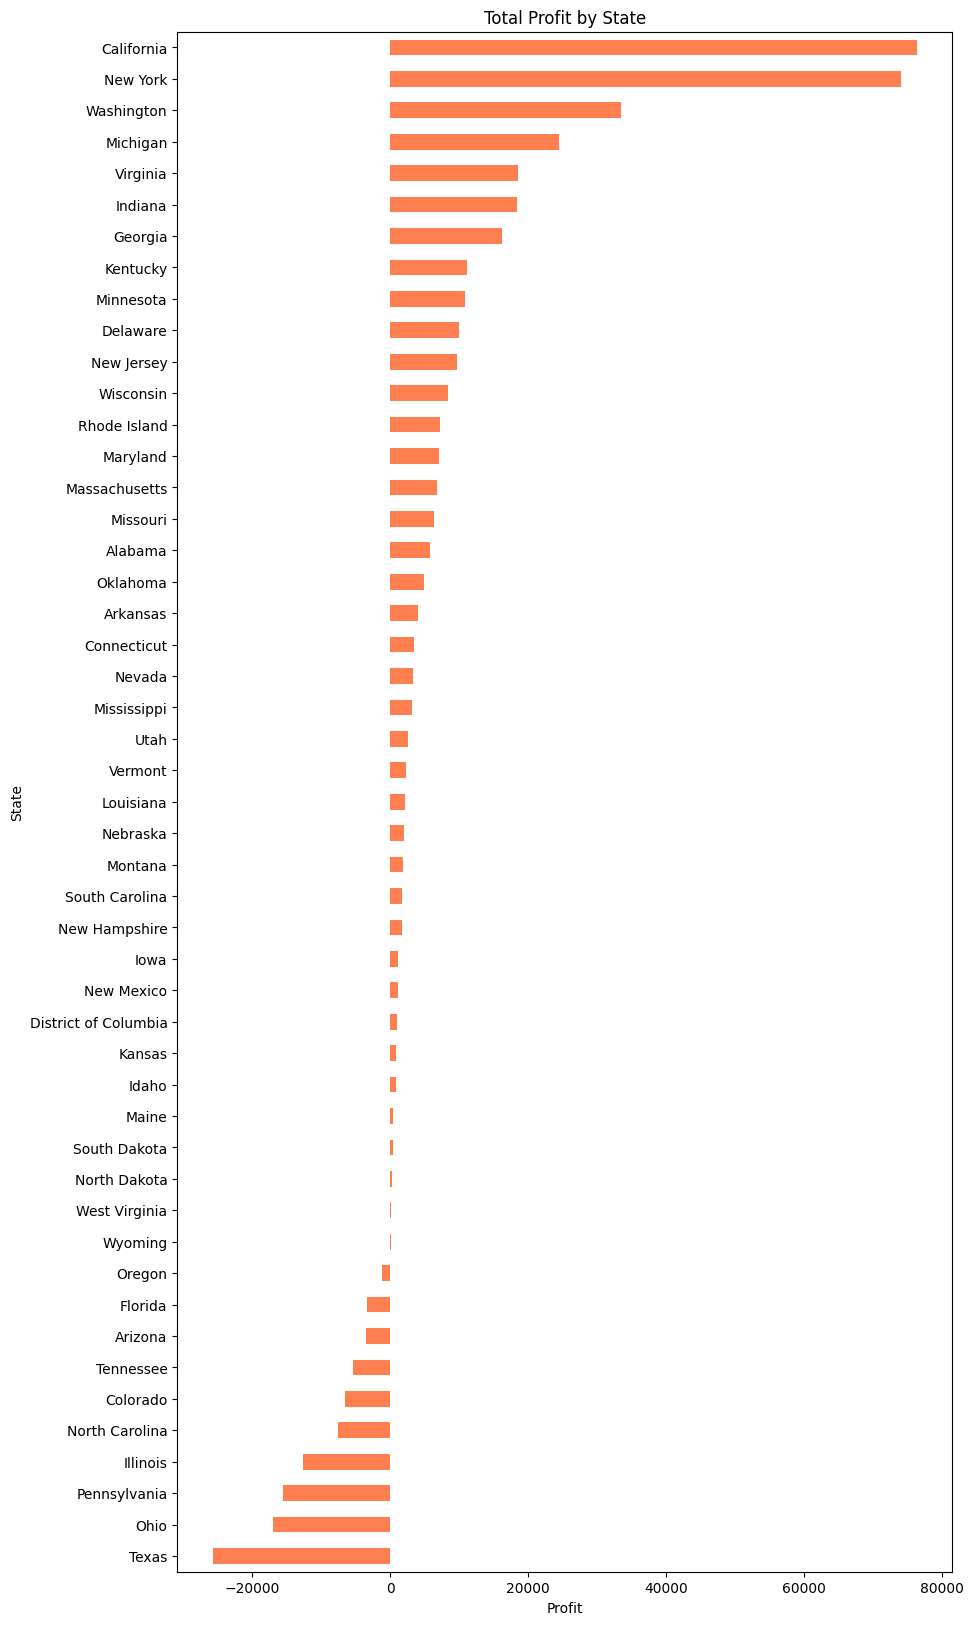

In [42]:
plt.figure(figsize=(10,20))
state_profit = df.groupby('State')['Profit'].sum().sort_values()
state_profit.plot(kind='barh', color='coral')
plt.title("Total Profit by State")
plt.xlabel("Profit")
plt.show()

**Insight:**

“Texas and Ohio are loss-making states. California and New York are the top contributors to profit.”

**“I explored key relationships like:**

-Discount vs Profit showed a clear trend of high discount leading to loss.

-Sales vs Profit showed inconsistency, proving sales alone can’t define profitability.

-Sub-categories like Tables and Bookcases are loss-makers, whereas Copiers are profit boosters.

-Region and State analysis revealed Texas is pulling profits down.

-These helped me pinpoint problem areas for business optimization.”

# **4.Time Series & Trend Analysis**

Let’s analyze how sales and profit changed over time (months/years)

**Convert Dates to Datetime Format**

In [44]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

**Create New Columns for Year & Month**

In [45]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df['Month_Year'] = df['Order Date'].dt.to_period('M')

In [46]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month_Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,November,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,November,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,June,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,October,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,October,2015-10


**Trend of Sales Over Time**

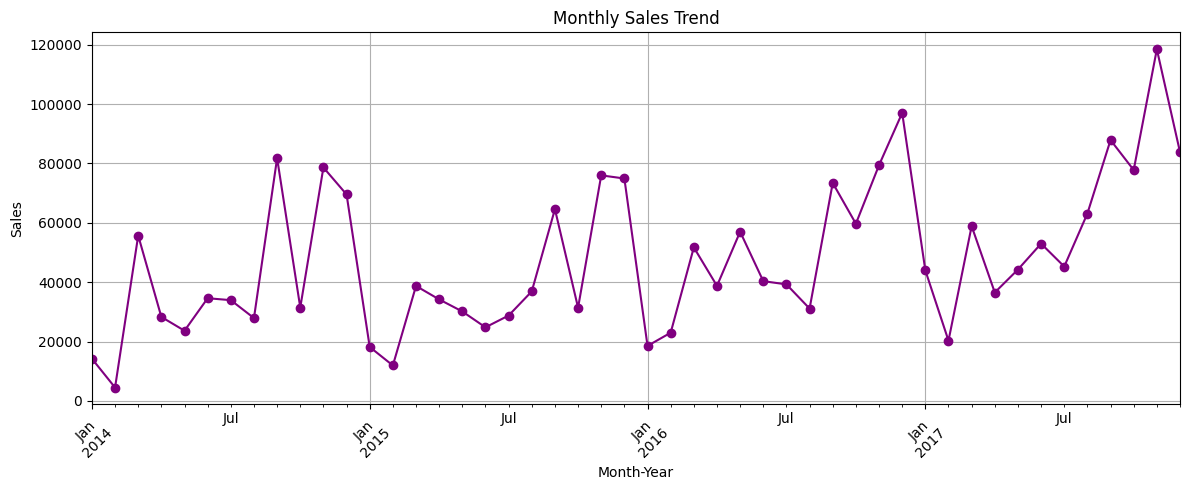

In [47]:
monthly_sales = df.groupby('Month_Year')['Sales'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o', color='purple')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**

“Sales are seasonal. Peak sales are seen around November–December, probably due to holiday season shopping.”

**Trend of Profit Over Time**

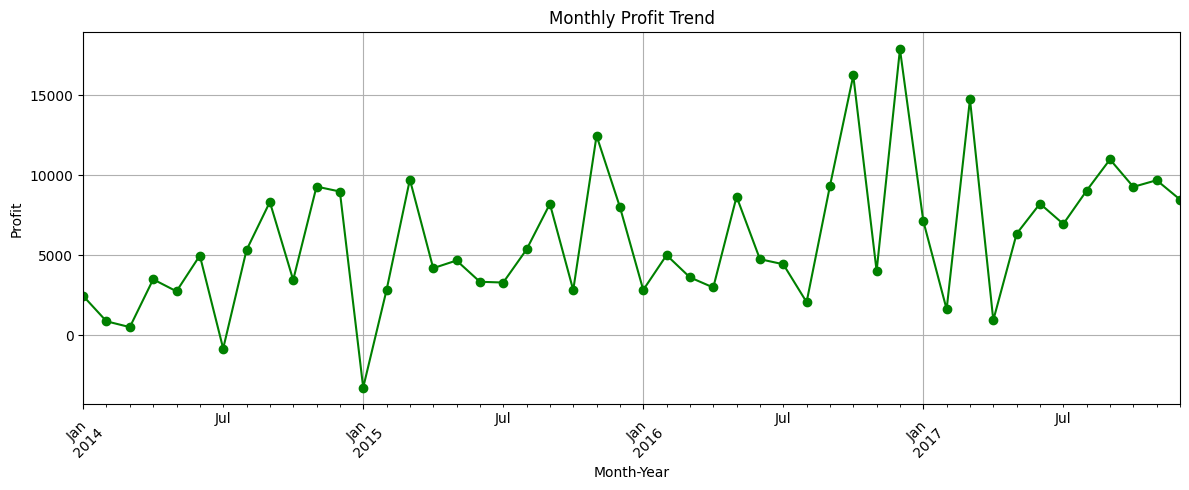

In [48]:
monthly_profit = df.groupby('Month_Year')['Profit'].sum()

plt.figure(figsize=(12,5))
monthly_profit.plot(marker='o', color='green')
plt.title("Monthly Profit Trend")
plt.xlabel("Month-Year")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**

“Some months had good sales but low or even negative profit – this indicates issues in pricing/discount strategy during those months.”

**Year-Wise Total Sales and Profit**

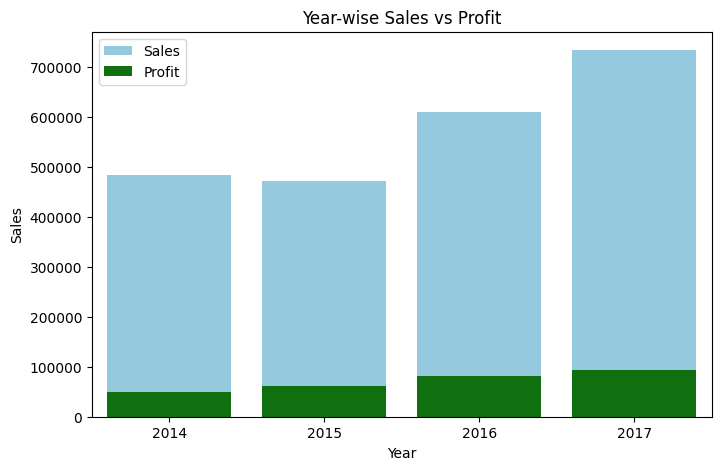

In [49]:
yearly = df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Sales', data=yearly, color='skyblue', label='Sales')
sns.barplot(x='Year', y='Profit', data=yearly, color='green', label='Profit')
plt.title("Year-wise Sales vs Profit")
plt.legend()
plt.show()

**Insight:**

“Year-on-year performance shows trends in both growth and loss — can help define business focus years.”

**“I conducted time series analysis to study monthly and yearly trends.**

-I found that sales spike in Nov-Dec due to seasonal shopping.

-Profit doesn't always follow sales – in some cases, high discounts led to
 losses.

-This helped me understand demand cycles, peak business seasons, and pricing
 impact.”

# **5.Detecting and Understanding Outliers:**

-Sales

-Profit

-Discount

-Quantity

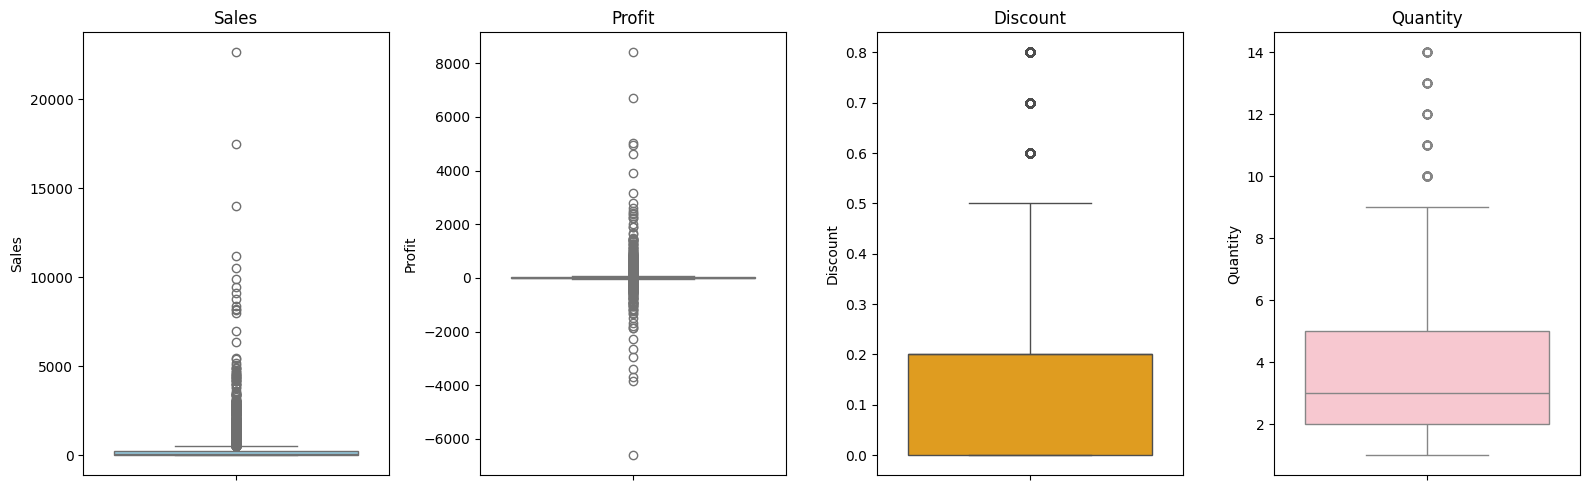

In [52]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
sns.boxplot(y=df['Sales'], color='skyblue')
plt.title('Sales')

plt.subplot(1, 4, 2)
sns.boxplot(y=df['Profit'], color='lightgreen')
plt.title('Profit')

plt.subplot(1, 4, 3)
sns.boxplot(y=df['Discount'], color='orange')
plt.title('Discount')

plt.subplot(1, 4, 4)
sns.boxplot(y=df['Quantity'], color='pink')
plt.title('Quantity')

plt.tight_layout()
plt.show()

**See Outlier Values (Z-Score Method )**

In [51]:
from scipy.stats import zscore

df_numeric = df[['Sales', 'Profit', 'Discount', 'Quantity']]
z_scores = zscore(df_numeric)
outliers = (abs(z_scores) > 3)
outlier_rows = df[outliers.any(axis=1)]

print(f"Total Outlier Rows: {len(outlier_rows)}")
outlier_rows.head()


Total Outlier Rows: 558


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month_Year
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580,2015,November,2015-11
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160,2015,November,2015-11
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,2015,September,2015-09
75,76,US-2017-118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,Office Supplies,Binders,Economy Binders,1.248,3,0.8,-1.9344,2017,December,2017-12
101,102,CA-2016-158568,2016-08-29,2016-09-02,Standard Class,RB-19465,Rick Bensley,Home Office,United States,Chicago,...,Office Supplies,Binders,Avery Hidden Tab Dividers for Binding Systems,1.788,3,0.8,-3.0396,2016,August,2016-08


“I used boxplots to detect outliers in numerical columns.

Sales and profit had significant outliers, especially in high-value orders.

I also used Z-score to identify and optionally filter them during modeling.

Instead of blindly removing them, I analyzed their business context – some outliers are valuable bulk sales.”

# **6.Actionable Business Insights:**

**Top 10 Profitable Products**

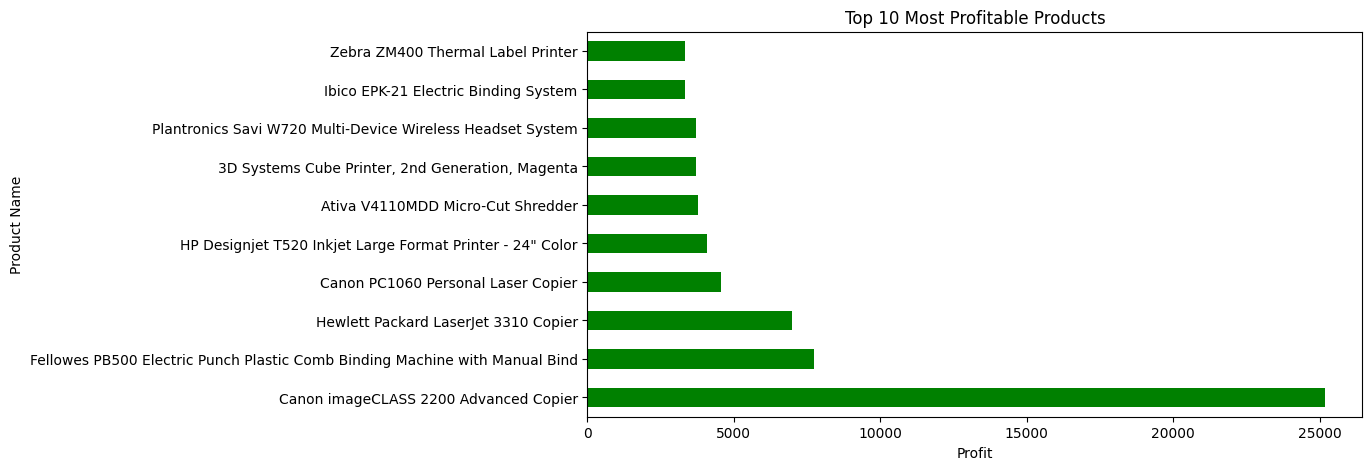

In [53]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='barh', color='green')
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Profit")
plt.show()

**Insight:**

“These products are the cash cows – business should promote and ensure availability of these.”

**Worst 10 Loss-Making Products**

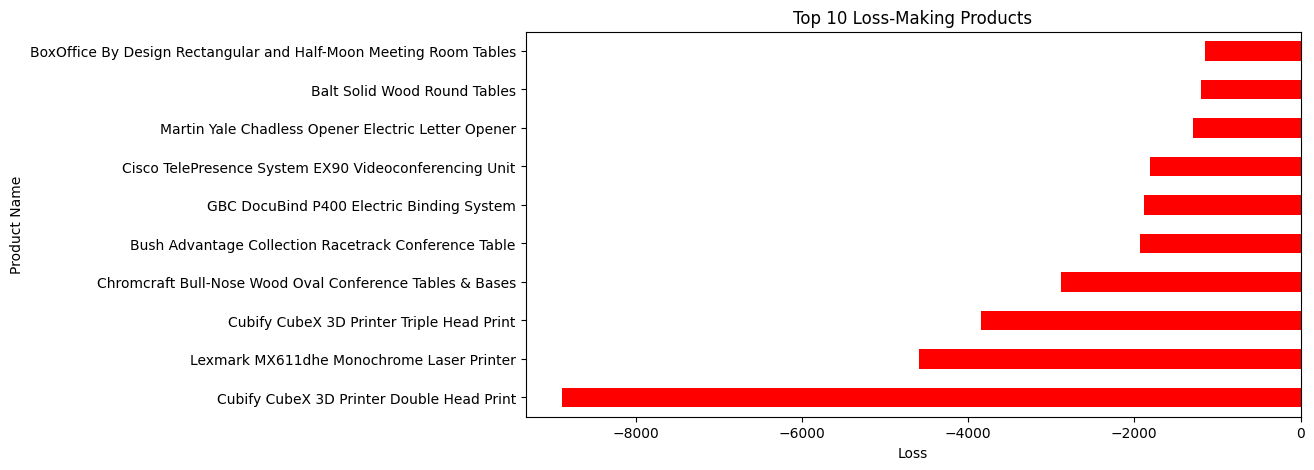

In [54]:
worst_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

plt.figure(figsize=(10,5))
worst_products.plot(kind='barh', color='red')
plt.title("Top 10 Loss-Making Products")
plt.xlabel("Loss")
plt.show()

**Insight:**

“Need urgent action – stop discounts, reprice, or stop selling these.”

**Top 10 Customers by Profit**

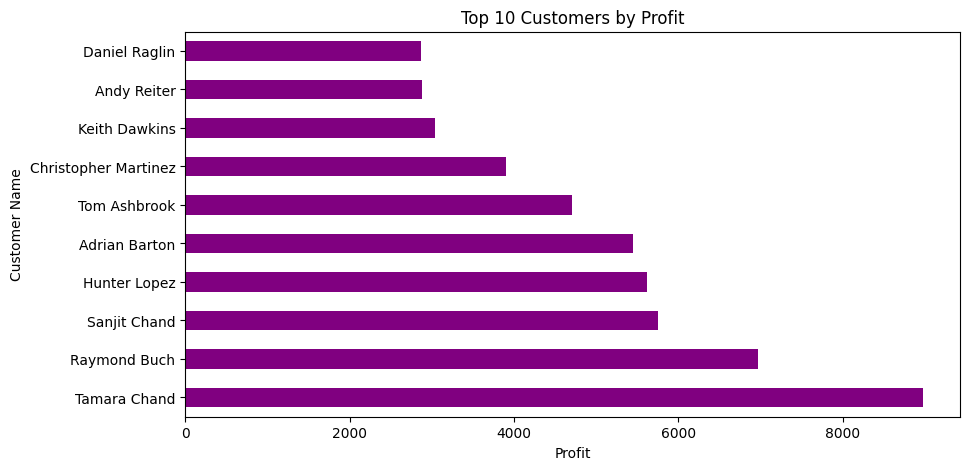

In [55]:
top_customers = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_customers.plot(kind='barh', color='purple')
plt.title("Top 10 Customers by Profit")
plt.xlabel("Profit")
plt.show()

**Insight:**

“These are VIP customers – loyal and profitable – business should retain them.”

**City-Wise Profit**

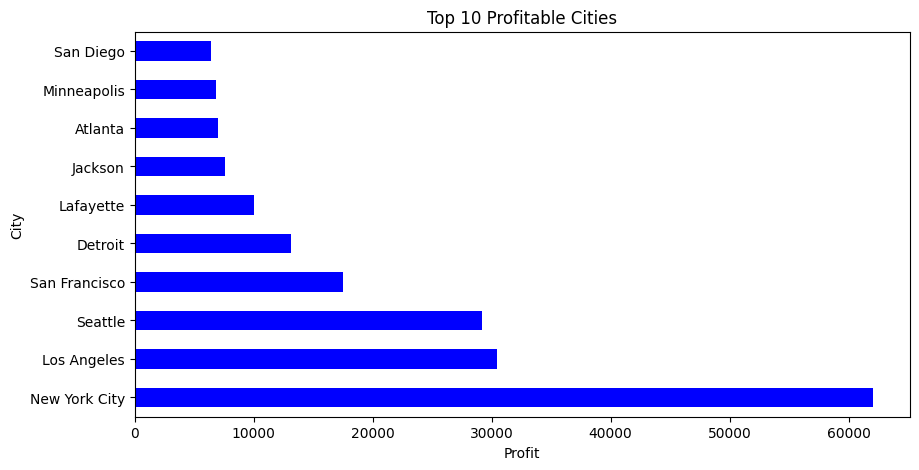

In [56]:
city_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
city_profit.plot(kind='barh', color='blue')
plt.title("Top 10 Profitable Cities")
plt.xlabel("Profit")
plt.show()

**Correaltion + Heatmap**

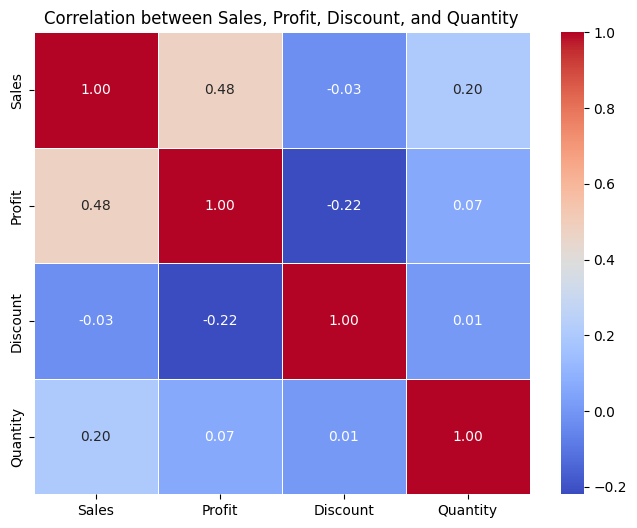

In [57]:
plt.figure(figsize=(8, 6))
correlation = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Sales, Profit, Discount, and Quantity")
plt.show()

# **Conclusion:**

**This EDA revealed vital business insights:**

Some states and sub-categories consistently generate losses.

Discount strategy needs optimization as it directly eats into profit.

Focused marketing and inventory adjustments are needed in low-performing regions and product lines.

Seasonal sales trends can help optimize supply chain and staffing.

📌 These insights, when applied, can guide better decision-making in sales strategy, inventory planning, and customer targeting for improved profitability.

